# Deskripsi

Data ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (setoran berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

Untuk mengidentifikasi calon nasabah yang membuka term deposit di banknya

Alogaritma yang akan di pakai



1.   Decision Tree
2.   linear regression
3.   Random Forest
4.   KNN



# Library

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import Database

In [211]:
datasets = pd.read_csv('./bank-additional-full.csv', sep=";")
datasets

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [212]:
#mengecek kolom
datasets.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [213]:
#mengecek type dari kolom
datasets.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [214]:
#cek kolom yang null
datasets.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#Data Preprocessing 

In [215]:
#melihat data duplicate pada kolom
datasets[datasets.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [216]:
#reset index 
datasets.reset_index(inplace=True)
datasets.drop('index',axis=1,inplace=True)
datasets

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [217]:
datasets.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of age')

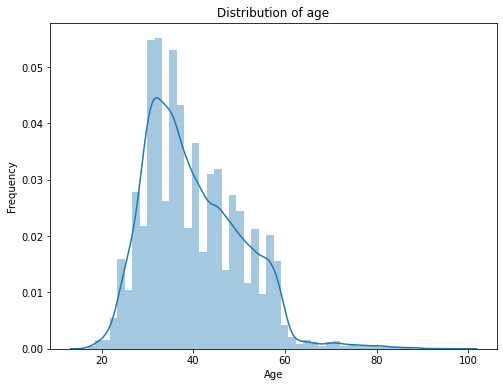

In [218]:
plt.figure(figsize=(8,6))
sns.distplot(datasets.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')

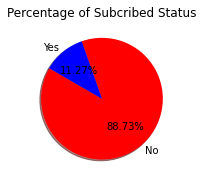

In [219]:
plt.subplot(122)
plt.title("Percentage of Subcribed Status")
subscribed_values_count = datasets['y'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['red', 'blue']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

# Convert all categorical variable into numerical structure

mengubah kategori ke angka dalam kolom
job,marital,education,Default,Housing,Loan,Contact,Month,Day_of_week,Poutcome and y

In [220]:
datasets.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [221]:
datasets.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [222]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

In [223]:
datasets.job = l_enc.fit_transform(datasets.job)

In [224]:
datasets.job.unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [225]:
datasets.marital.unique()
print(sorted(datasets.marital.unique()))
datasets.marital = datasets.marital.replace(['divorced', 'married', 'single', 'unknown'],[0,1,2,3])

['divorced', 'married', 'single', 'unknown']


In [226]:
datasets.education.unique()
print(sorted(datasets.education.unique()))
datasets.education = datasets.education.replace(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'],
                                    [0,1,2,3,4,5,6,7])

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


In [227]:
datasets.default.unique()
print(sorted(datasets.default.unique()))
datasets.default = datasets.default.replace(['no', 'unknown', 'yes'],[0,1,2])

['no', 'unknown', 'yes']


In [228]:
datasets.housing.unique()
datasets.housing = datasets.housing.replace(['no', 'unknown', 'yes'],[0,1,2])

In [229]:
datasets.loan.unique()
datasets.loan = datasets.loan.replace(['no', 'unknown', 'yes'],[0,1,2])

In [230]:
datasets.contact.unique()
datasets.contact = datasets.contact.replace(['telephone', 'cellular'],[1,0])

In [231]:
print(sorted(datasets.month.unique()))
datasets.month = datasets.month.replace(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],range(0,10))

['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [232]:
print(sorted(datasets.day_of_week.unique()))
datasets.day_of_week = datasets.day_of_week.replace(['fri', 'mon', 'thu', 'tue', 'wed'],[0,1,2,3,4])

['fri', 'mon', 'thu', 'tue', 'wed']


In [233]:
print(sorted(datasets.poutcome.unique()))
datasets.poutcome = datasets.poutcome.replace(['failure', 'nonexistent', 'success'],[0,1,2])

['failure', 'nonexistent', 'success']


In [234]:
datasets.y.unique()
datasets.y = datasets.y.replace(['no', 'yes'],[0,1])

# Korelasi antar kolom



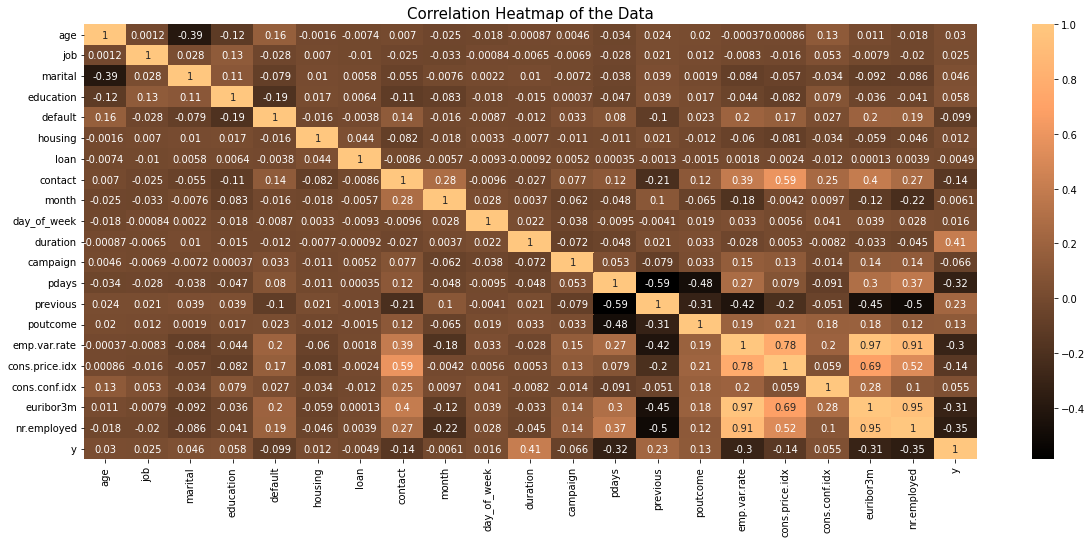

In [235]:
plt.figure(figsize=(20,8))
sns.heatmap(datasets.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

In [236]:
# drop features yang memiliki korelasi lebih sedikit dan tidak relevan dengan proses klasifikasi
datasets.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)

In [237]:
datasets

,age,job,marital,education,default,housing,loan,duration,campaign,previous,poutcome,y
0,56,3,1,0,0,0,0,261,1,0,1,0
1,57,7,1,3,1,0,0,149,1,0,1,0
2,37,7,1,3,0,2,0,226,1,0,1,0
3,40,0,1,1,0,0,0,151,1,0,1,0
4,56,7,1,3,0,0,2,307,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,334,1,0,1,1
41184,46,1,1,5,0,0,0,383,1,0,1,0
41185,56,5,1,6,0,2,0,189,2,0,1,0
41186,44,9,1,5,0,0,0,442,1,0,1,1


#TRAIN

In [238]:
datasets.rename(columns={ "y":"subscribed"}, inplace=True)

In [239]:
X = datasets.loc[:,datasets.columns != 'subscribed']
y = datasets.loc[:,datasets.columns == 'subscribed']

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# LogisticRegression

Accuracy is  89.97

In [241]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# Train Your Model
LR.fit(X_train,y_train)

# Predict the model
LR_predicted_y = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [242]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Confusion Matrix
LR_CM = confusion_matrix(y_test,LR_predicted_y)
print(LR_CM)

# Accuracy Score
Accuracy = round(accuracy_score(y_test,LR_predicted_y)*100,2)
print('LR_Accuracy is ', Accuracy)
print(classification_report(y_test,LR_predicted_y))

[[10750   219]
 [ 1021   367]]
LR_Accuracy is  89.97
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.63      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.77      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



In [243]:
print(classification_report(y_test,LR_predicted_y))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.63      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.77      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



# DecisionTreeClassifier

Accuracy_Score is  85.82

In [244]:
from sklearn.tree import DecisionTreeClassifier
DCT = DecisionTreeClassifier() # Fully growned tree which has more bias and variance error

# Train the model
DCT.fit(X_train,y_train)

# Predict the model
DCT_predicted_y = DCT.predict(X_test)
# Confusion Matrix
DCT_CM = confusion_matrix(y_test,DCT_predicted_y)
print(DCT_CM)

# Accuracy Score
DCT_Accuracy_Score = round(accuracy_score(y_test,DCT_predicted_y)*100,2)
print('DCT_Accuracy_Score is ', DCT_Accuracy_Score)

# Classification Report
print(classification_report(y_test,DCT_predicted_y))

[[10048   921]
 [  820   568]]
DCT_Accuracy_Score is  85.91
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10969
           1       0.38      0.41      0.39      1388

    accuracy                           0.86     12357
   macro avg       0.65      0.66      0.66     12357
weighted avg       0.86      0.86      0.86     12357



# RandomForestClassifier

Accuracy_Score is  90.15

In [245]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)

RFC.fit(X_train,y_train)

RFC_predicted_y = RFC.predict(X_test)
RFC_CM = confusion_matrix(y_test,RFC_predicted_y)
print(RFC_CM)

# Accuracy Score
RFC_Accuracy_Score = round(accuracy_score(y_test,RFC_predicted_y)*100,2)
print('RFC_Accuracy_Score is ', RFC_Accuracy_Score)

# Classification Report
print(classification_report(y_test,RFC_predicted_y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[10638   331]
 [  886   502]]
RFC_Accuracy_Score is  90.15
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10969
           1       0.60      0.36      0.45      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357



# KNeighborsClassifier

Accuracy_Score is  88.76

In [246]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2)

KNN.fit(X_train,y_train)

KNN_predicted_y = KNN.predict(X_test)
# Confusion Matrix
KNN_CM = confusion_matrix(y_test,KNN_predicted_y)
print(KNN_CM)

# Accuracy Score
KNN_Accuracy_Score = round(accuracy_score(y_test,KNN_predicted_y)*100,2)
print('KNN_Accuracy_Score is ', KNN_Accuracy_Score)

# Classification Report
print(classification_report(y_test,KNN_predicted_y))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[10754   215]
 [ 1174   214]]
KNN_Accuracy_Score is  88.76
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10969
           1       0.50      0.15      0.24      1388

    accuracy                           0.89     12357
   macro avg       0.70      0.57      0.59     12357
weighted avg       0.86      0.89      0.86     12357



# Kesimpulan

Dari Ke empat model  Random forest memeliki Accuracy score yang lebih baik dari yang lainnya dengan 90.15% accuracy score

In [248]:
# simpan model kedalam file denga pickle
import pickle
pickle.dump(RFC, open('./model_classifier.pkl','wb'))